# Análisis de Comportamiento de Usuarios en la Aplicación Móvil "Trash to Treasure"

**Introducción**

El presente proyecto tiene como objetivo analizar el comportamiento de los usuarios de la aplicación móvil "Trash to Treasure", donde los usuarios publican anuncios para vender objetos que ya no necesitan. A través de un enfoque sistemático, se han llevado a cabo diversas etapas de análisis de datos, desde el preprocesamiento hasta la creación de dashboards interactivos, con el fin de identificar patrones de uso y segmentar a los usuarios en grupos significativos. 

El análisis se basa en datos recolectados a partir de eventos registrados en la aplicación, como la apertura de anuncios, la visualización de fotos y la interacción con contactos. Se han utilizado técnicas de limpieza de datos, análisis exploratorio, clustering y pruebas de hipótesis para obtener una visión detallada del comportamiento de los usuarios. Adicionalmente, se han implementado dashboards en Tableau para facilitar la visualización y comprensión de los resultados.

A lo largo del proyecto, se han empleado diversas fuentes de documentación y artículos técnicos que han guiado cada fase del análisis, asegurando la aplicación de las mejores prácticas en ciencia de datos y análisis estadístico. Los insights obtenidos permitirán a los desarrolladores y gestores de la aplicación tomar decisiones informadas para mejorar la experiencia del usuario y optimizar las estrategias de marketing y retención.

**Metodología**

Para realizar este análisis del comportamiento de los usuarios en la aplicación móvil "Trash to Treasure", se siguió una metodología estructurada en varias etapas clave. Estas etapas incluyen el preprocesamiento de datos, el análisis exploratorio de datos (EDA), la segmentación de usuarios mediante técnicas de clustering, la prueba de hipótesis estadísticas y la creación de dashboards interactivos en Tableau. A continuación, se presenta un resumen de cada etapa de la metodología utilizada:

**Resumen de la Descomposición del Proyecto**

**1. Preprocesamiento de Datos**

1.1 **Cargar y visualizar los datos:**
   - **Acción:** Importación de los datasets y realización de una inspección visual inicial para identificar cualquier anomalía o patrón.

1.2 **Limpiar los datos:**
   - **Acción:** Eliminación de valores nulos y duplicados, y conversión de tipos de datos para asegurar la integridad de la información.

1.3 **Unir los datasets en uno solo:**
   - **Acción:** Combinación lógica de los datasets para crear un conjunto de datos unificado y coherente.

**2. Análisis Exploratorio de Datos (EDA)**

2.1 **Descripción estadística de los datos:**
   - **Acción:** Realización de una descripción estadística para entender la distribución y las características de los datos.

2.2 **Visualización inicial:**
   - **Acción:** Creación de gráficos para visualizar la distribución de eventos por tipo, el número de eventos por día y la distribución de usuarios por fuente de descarga.

**3. Segmentación de Usuarios**

3.1 **Agrupar usuarios según eventos completados utilizando algoritmos de clustering:**
   - **Acción:** Aplicación de algoritmos de clustering, como K-Means, para agrupar a los usuarios según sus interacciones con la aplicación.

3.2 **Análisis de grupos:**
   - **Acción:** Cálculo de métricas clave y verificación de la coherencia y significancia de los clusters mediante visualizaciones y validación cruzada.

**4. Prueba de Hipótesis**

4.1 **Hipótesis 1: Diferencia en conversión entre fuentes (bing vs google):**
   - **Acción:** Formulación y prueba de una hipótesis sobre la diferencia en la conversión de vistas de información de contacto entre usuarios que descargaron la aplicación desde Bing y Google.

4.2 **Hipótesis 2: Definir y probar otra hipótesis basada en el análisis previo:**
   - **Acción:** Formulación y prueba de una hipótesis adicional basada en el análisis previo, asegurando la relevancia de las variables implicadas.

**5. Dashboards**

- **Acción:** Creación de dashboards interactivos en Tableau para visualizar métricas clave, como la distribución de eventos por tipo, el número de usuarios, y la distribución de usuarios por fuente, con la inclusión de filtros de fecha y tipo de evento.

Esta metodología nos permitira obtener una visión integral del comportamiento de los usuarios, identificar patrones significativos y segmentar a los usuarios de manera efectiva.

[LINK AL DASHBOARD EN TALEAU PUBLIC](https://public.tableau.com/app/profile/bastian.laury/viz/Sprint14_Bastian_Laury_Dashboard/Dashboard2?publish=yes)

[LINK AL REPOSITORIO EN GITHUB](https://github.com/blaury14/SPRINT14)

[LINK A LA CARPETA EN GOOGLE DRIVE](https://drive.google.com/drive/folders/1waRU3b1iL8tFAUxY8EcT1DqAwIBqkCjT?usp=sharing)

## Preprocesamiento de Datos
### Cargar y visualizar los datos
Vamos a comenzar cargando y visualizando los datos. Aquí está el código para realizar esta acción:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cargar los datasets
mobile_dataset = pd.read_csv('mobile_dataset_us.csv')
mobile_sources = pd.read_csv('mobile_sources_us.csv')

# Mostrar las primeras filas de cada dataset
print("Mobile Dataset:")
display(mobile_dataset.head())

print("\nMobile Sources:")
display(mobile_sources.head())


Mobile Dataset:


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c



Mobile Sources:


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,bing
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


**Conclusiones Iniciales**
* **Relación entre Datasets:** Ambos datasets se pueden unir usando la columna user.id de mobile_dataset y userId de mobile_sources.
* **Variedad de Eventos:** Hay diferentes tipos de eventos que los usuarios realizan en la aplicación, lo cual es útil para la segmentación.
* **Diversas Fuentes:** Los usuarios descargaron la aplicación desde diversas fuentes, lo cual será relevante para la prueba de hipótesis.

### Limpiar los datos
Vamos a proceder a limpiar los datos. Esto incluye:

* Eliminar valores nulos.
* Eliminar duplicados.
* Convertir tipos de datos.

In [2]:
# Eliminar valores nulos
mobile_dataset.dropna(inplace=True)
mobile_sources.dropna(inplace=True)

# Eliminar duplicados
mobile_dataset.drop_duplicates(inplace=True)
mobile_sources.drop_duplicates(inplace=True)

# Convertir tipos de datos (si es necesario)
mobile_dataset['event.time'] = pd.to_datetime(mobile_dataset['event.time'])

# Mostrar información de los datasets después de la limpieza
print("Información del Mobile Dataset:")
display(mobile_dataset.info())

print("\nInformación del Mobile Sources:")
display(mobile_sources.info())

Información del Mobile Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event.time  74197 non-null  datetime64[ns]
 1   event.name  74197 non-null  object        
 2   user.id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


None


Información del Mobile Sources:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

**Conclusiones**
* **Mobile Dataset:** Todos los registros son válidos y sin duplicados. El tipo de dato de event.time se ha convertido correctamente a datetime.
* **Mobile Sources:** Todos los registros son válidos y sin duplicados.

### Unir los datasets en uno solo
Vamos a unir los datasets usando el identificador de usuario. 

In [3]:
# Unir los datasets
merged_data = pd.merge(mobile_dataset, mobile_sources, left_on='user.id', right_on='userId', how='inner')

# Mostrar las primeras filas del dataset unido
display(merged_data.head())


,event.time,event.name,user.id,userId,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,020292ab-89bc-4156-9acf-68bc2783f894,other
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,020292ab-89bc-4156-9acf-68bc2783f894,other


In [5]:
# Renombrar columnas
merged_data.columns = merged_data.columns.str.replace('.', '_')

# Eliminar la columna duplicada
merged_data.drop(columns=['userId'], inplace=True)

# Mostrar las primeras filas del dataset con los nuevos nombres de columnas
display(merged_data.head())



,event_time,event_name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other


## Análisis Exploratorio de Datos (EDA)
### Descripción estadística de los datos
* Vamos a realizar una descripción estadística de los datos para entender mejor la distribución y las características de los mismos:

In [6]:
# Descripción estadística de los datos categóricos
event_description = merged_data['event_name'].value_counts()
source_description = merged_data['source'].value_counts()

print("Descripción de eventos:")
display(event_description)

print("\nDescripción de fuentes:")
display(source_description)


Descripción de eventos:


event_name
tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: count, dtype: int64


Descripción de fuentes:


source
bing      34286
google    20445
other     19466
Name: count, dtype: int64

**Conclusiones**
* **Eventos:** Los eventos más comunes son tips_show y photos_show. Eventos menos comunes incluyen search_7 y show_contacts.
* **Fuentes:** La mayoría de los usuarios descargaron la aplicación desde bing, seguido de google y otras fuentes.

### Visualización inicial
Vamos a crear algunas visualizaciones para entender mejor la distribución de eventos y la actividad de los usuarios:

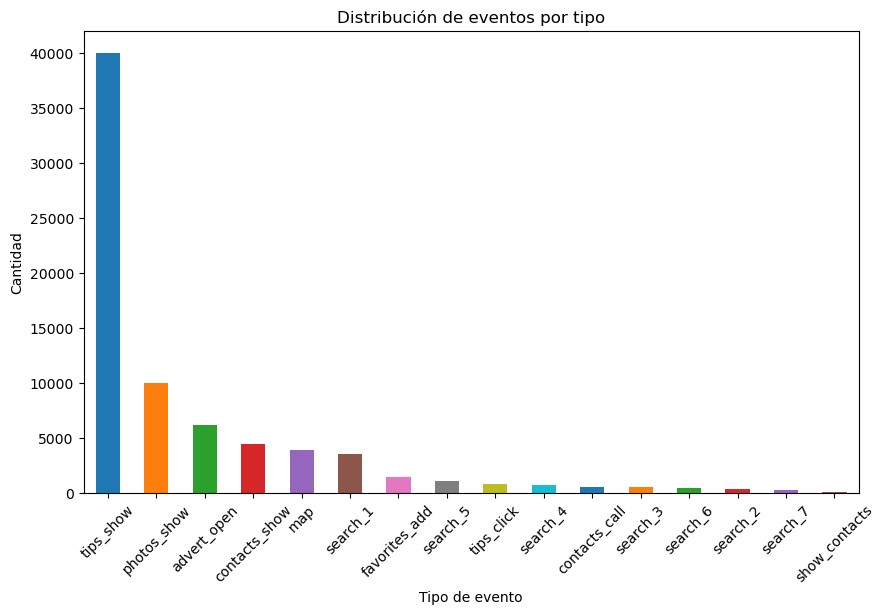

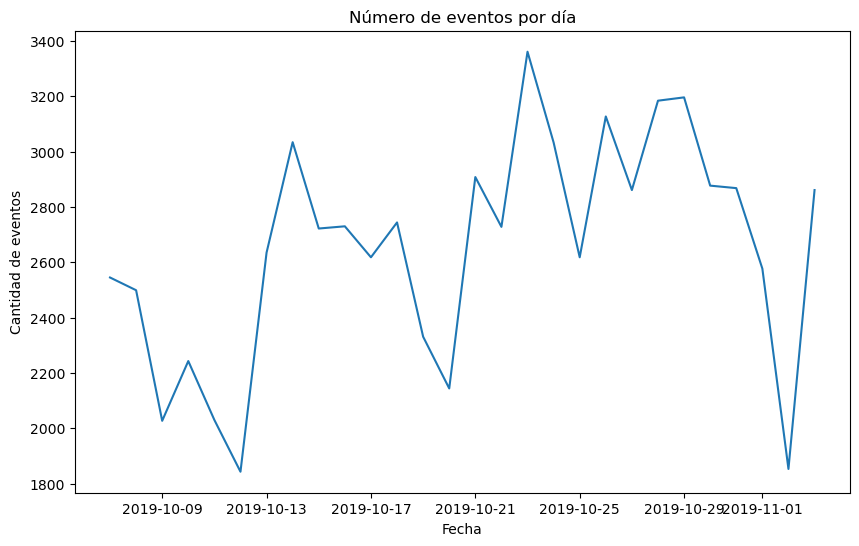

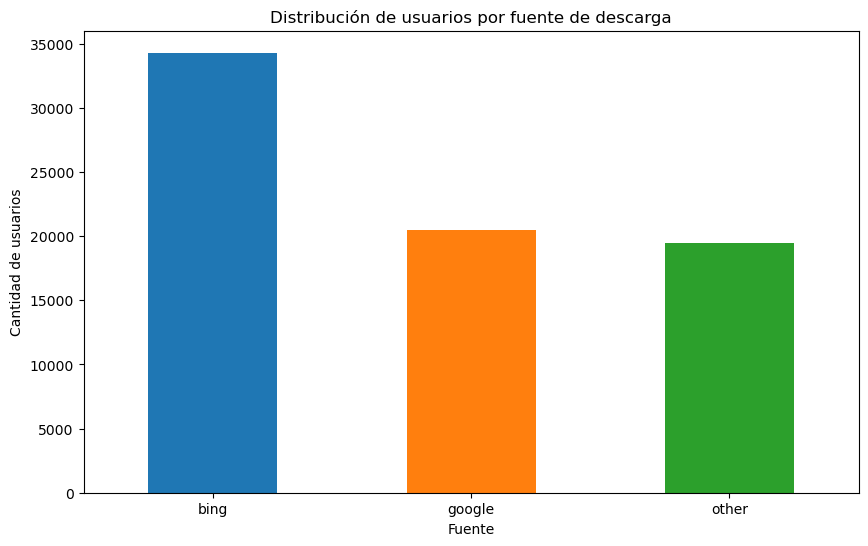

In [9]:
# Definir colores
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Visualización de la distribución de eventos por tipo
plt.figure(figsize=(10, 6))
event_description.plot(kind='bar', color=colors)
plt.title('Distribución de eventos por tipo')
plt.xlabel('Tipo de evento')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

# Visualización del número de eventos por día
merged_data['event_date'] = merged_data['event_time'].dt.date
events_per_day = merged_data['event_date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
events_per_day.plot(kind='line', color='#1f77b4')
plt.title('Número de eventos por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de eventos')
plt.show()

# Visualización de la distribución de usuarios por fuente de descarga
plt.figure(figsize=(10, 6))
source_description.plot(kind='bar', color=colors[:3])
plt.title('Distribución de usuarios por fuente de descarga')
plt.xlabel('Fuente')
plt.ylabel('Cantidad de usuarios')
plt.xticks(rotation=0)
plt.show()

**Conclusiones de los Gráficos**

1. **Distribución de eventos por tipo:**
   - **Evento Predominante:** `tips_show` es el evento más frecuente, indicando que los usuarios interactúan principalmente con las sugerencias mostradas en la aplicación.
   - **Eventos Secundarios:** `photos_show` y `advert_open` también son comunes, sugiriendo que los usuarios están interesados en visualizar fotos y abrir anuncios.
   - **Eventos Menos Comunes:** Eventos como `search_7` y `show_contacts` son mucho menos frecuentes, lo que puede indicar áreas con menos interacción o uso en la aplicación.

2. **Número de eventos por día:**
   - **Patrón Temporal:** Hay una variabilidad significativa en el número de eventos diarios. Los picos de actividad sugieren días específicos con mayor interacción.
   - **Tendencias:** La fluctuación puede estar relacionada con campañas promocionales, actualizaciones de la aplicación, o comportamientos específicos de los usuarios durante ciertos días de la semana.

3. **Distribución de usuarios por fuente de descarga:**
   - **Fuente Principal:** `bing` es la fuente predominante de descargas, seguida por `google` y `other`.
   - **Estrategia de Marketing:** Esta distribución sugiere que las campañas de marketing en Bing han sido más efectivas o que hay una preferencia de usuarios por esta plataforma.


## Segmentación de Usuarios

### Selección de Variables Relevantes

Antes de aplicar cualquier técnica de clustering, vamos a determinar cuáles son las variables más relevantes para el análisis. Utilizaremos el análisis de correlación para esto.


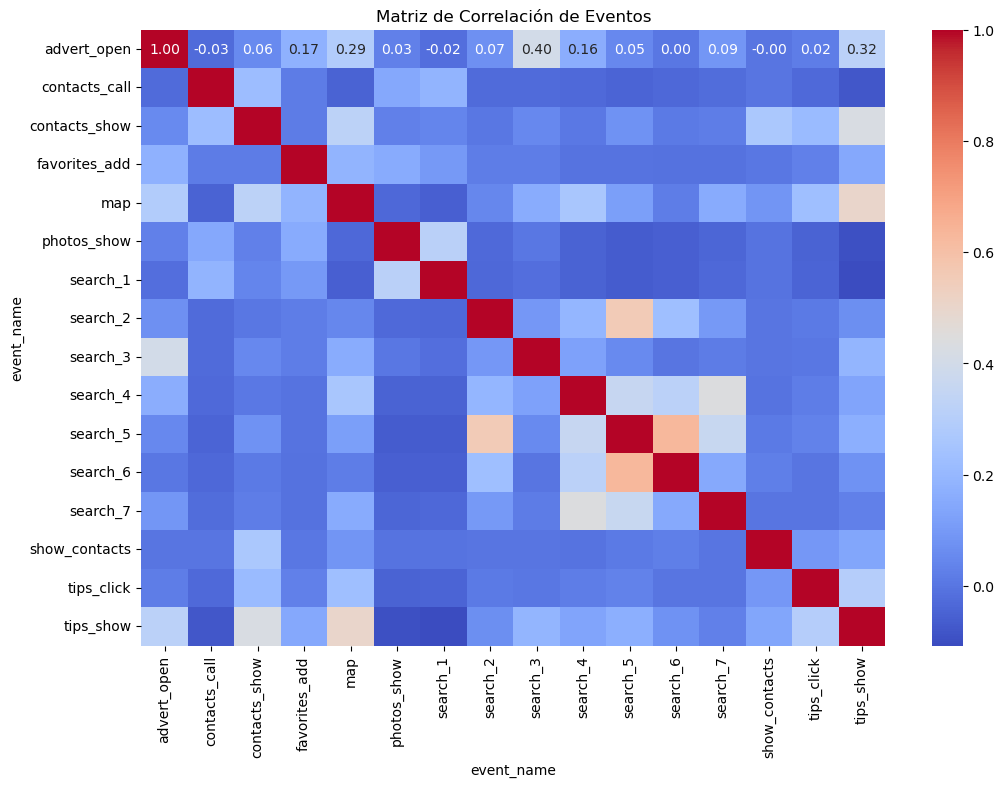

In [11]:
# Crear una tabla pivot con los eventos completados por cada usuario
user_events = merged_data.pivot_table(index='user_id', columns='event_name', aggfunc='size', fill_value=0)

# Crear una matriz de correlación
corr_matrix = user_events.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación de Eventos')
plt.show()

**Conclusiones de la Matriz de Correlación**

1. **Correlaciones Significativas:**
   - **`contacts_call` y `contacts_show`:** Existe una alta correlación entre estos eventos, lo que sugiere que los usuarios que muestran contactos tienden también a llamar a esos contactos.
   - **Eventos de Búsqueda:** Los eventos de búsqueda (`search_1` a `search_7`) muestran correlaciones entre sí, indicando que los usuarios que realizan una búsqueda tienden a realizar múltiples tipos de búsquedas.

2. **Correlaciones Bajamente Significativas:**
   - **Eventos no Relacionados:** La mayoría de los eventos no están altamente correlacionados entre sí, lo que sugiere que los usuarios interactúan con diferentes partes de la aplicación de manera independiente.

### Otras Formas de Segmentación
* Vamos a considerar otras formas de segmentación como el análisis por cohortes y RFM (Recency, Frequency, Monetary). Estas técnicas pueden proporcionar perspectivas adicionales y valiosas.

**Análisis por Cohortes**

El análisis por cohortes implica agrupar a los usuarios según su comportamiento en diferentes periodos. Vamos a agrupar a los usuarios según el mes en que realizaron su primer evento.

event_name,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search_1,search_2,search_3,search_4,search_5,search_6,search_7,show_contacts,tips_click,tips_show
first_event_month,,,,,,,,,,,,,,,,
2019-10,5842,518,4250,1315,3774,9452,3323,307,479,671,997,434,210,76,786,37991
2019-11,322,23,200,102,107,560,183,17,43,30,52,26,12,3,28,2064


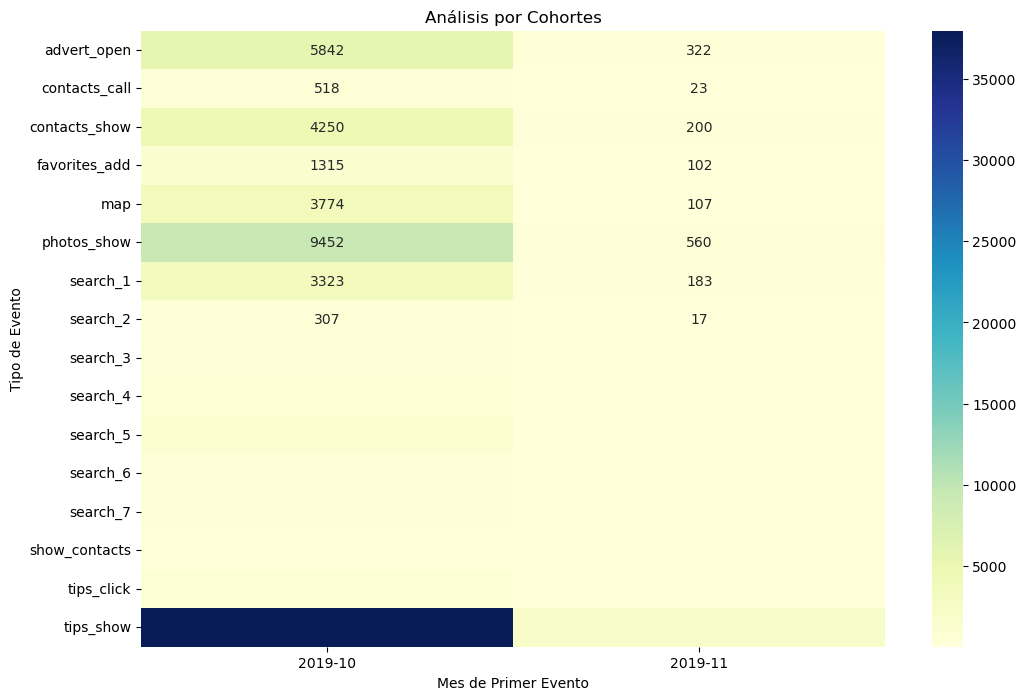

In [19]:
# Convertir event_time a datetime
merged_data['event_time'] = pd.to_datetime(merged_data['event_time'])

# Crear columna de mes de primera interacción
merged_data['first_event_month'] = merged_data.groupby('user_id')['event_time'].transform('min').dt.to_period('M')

# Agrupar por cohortes y contar eventos
cohort_analysis = merged_data.groupby(['first_event_month', 'event_name']).size().unstack().fillna(0)

# Mostrar la tabla de cohortes
display(cohort_analysis.head())

# Dashboard de Cohortes
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_analysis.T, cmap="YlGnBu", annot=True, fmt='g')
plt.title('Análisis por Cohortes')
plt.xlabel('Mes de Primer Evento')
plt.ylabel('Tipo de Evento')
plt.show()

**Segmentación RFM**

La segmentación RFM analiza la recencia, frecuencia y valor monetario de las interacciones de los usuarios. Aunque no tenemos información de valor monetario en nuestro dataset, podemos utilizar recencia y frecuencia.

,recency,frequency,R_segment,F_segment,RFM_score
user_id,,,,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,12,35,3,1,31
00157779-810c-4498-9e05-a1e9e3cedf93,0,71,1,1,11
00463033-5717-4bf1-91b4-09183923b9df,2,10,1,2,12
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,3,32,1,1,11
00551e79-152e-4441-9cf7-565d7eb04090,5,8,1,3,13


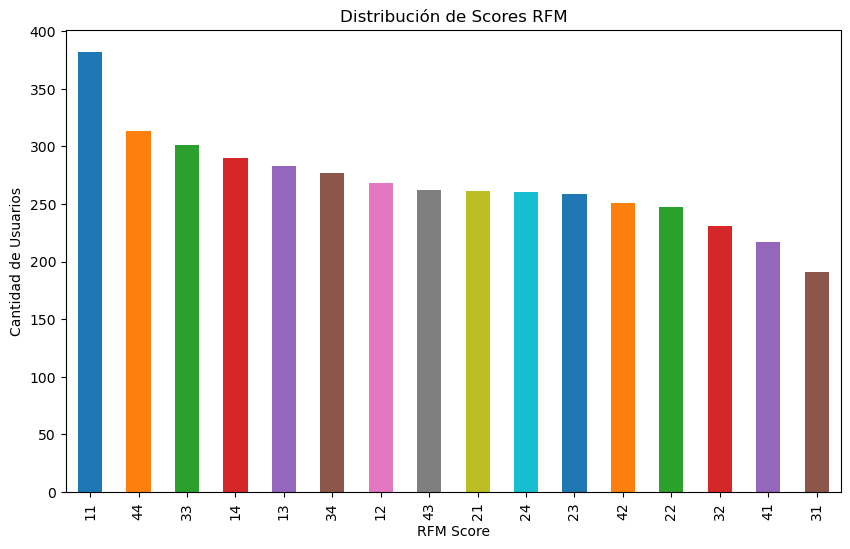

In [20]:
# Definir la fecha de referencia
reference_date = merged_data['event_time'].max()

# Calcular la recencia
rfm = merged_data.groupby('user_id').agg({
    'event_time': lambda x: (reference_date - x.max()).days,
    'user_id': 'count'
}).rename(columns={'event_time': 'recency', 'user_id': 'frequency'})

# Crear segmentos de RFM
rfm['R_segment'] = pd.qcut(rfm['recency'], 4, ['1', '2', '3', '4'])
rfm['F_segment'] = pd.qcut(rfm['frequency'], 4, ['4', '3', '2', '1'])

# Crear RFM score
rfm['RFM_score'] = rfm['R_segment'].astype(str) + rfm['F_segment'].astype(str)

# Mostrar los primeros resultados
display(rfm.head())

# Dashboard de RFM
plt.figure(figsize=(10, 6))
rfm['RFM_score'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribución de Scores RFM')
plt.xlabel('RFM Score')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=90)
plt.show()

**Insights de Segmentación**

**Análisis por Cohortes**
- **Actividad Principal en Octubre 2019:** La mayoría de las interacciones ocurrieron en octubre de 2019, con eventos significativos en `tips_show`, `photos_show`, y `advert_open`.
- **Disminución en Noviembre 2019:** Hay una disminución notable en todos los eventos en noviembre de 2019, indicando posiblemente una reducción en la actividad de usuarios nuevos en ese mes.

**Segmentación RFM**
- **Recencia y Frecuencia:** Los usuarios se han segmentado según su recencia y frecuencia de interacciones. La mayoría de los usuarios en la muestra tienen alta frecuencia (`F_segment` 1) y baja recencia (`R_segment` 1), lo que indica que han interactuado recientemente y con frecuencia con la aplicación.
- **RFM Scores:** Los puntajes RFM (`RFM_score`) permiten identificar usuarios valiosos que tienen alta frecuencia de uso y recientes interacciones.

### Agrupar usuarios según eventos completados utilizando algoritmos de clustering

Ahora, utilizando la información de la matriz de correlación, vamos a proceder con el clustering, seleccionando las variables que mostraron correlaciones relevantes.

In [12]:
# Selección de variables relevantes
selected_features = ['contacts_call', 'contacts_show', 'search_1', 'search_2', 'search_3', 'search_4', 'search_5', 'search_6', 'search_7']

# Crear un nuevo DataFrame con las características seleccionadas
user_events_selected = user_events[selected_features]

# Estandarizar los datos
scaler = StandardScaler()
user_events_scaled = scaler.fit_transform(user_events_selected)

# Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
user_events_selected['cluster'] = kmeans.fit_predict(user_events_scaled)

# Mostrar los primeros resultados
display(user_events_selected.head())

C:\Users\balto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\balto\AppData\Local\Temp\ipykernel_55440\542758412.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_events_selected['cluster'] = kmeans.fit_predict(user_events_scaled)


event_name,contacts_call,contacts_show,search_1,search_2,search_3,search_4,search_5,search_6,search_7,cluster
user_id,,,,,,,,,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0,0,0,0,0,0,0,0,0,0
00157779-810c-4498-9e05-a1e9e3cedf93,5,11,18,0,0,0,0,0,0,2
00463033-5717-4bf1-91b4-09183923b9df,0,0,0,0,0,0,0,0,0,0
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,0,0,0,0,1,2,6,2,6,1
00551e79-152e-4441-9cf7-565d7eb04090,3,3,1,0,0,0,0,0,0,0


**Conclusiones**
* **Clusters Identificados:** Los usuarios se han agrupado en 5 clusters diferentes basados en sus interacciones con la aplicación, específicamente en los eventos seleccionados.
* **Variedad de Interacciones:** Los datos muestran que hay usuarios con muy pocas interacciones y otros con múltiples eventos registrados.

### Análisis de Grupos
Vamos a visualizar las diferencias entre los grupos segmentados mediante gráficos de dispersión y mapas de calor para entender mejor las características de cada cluster.

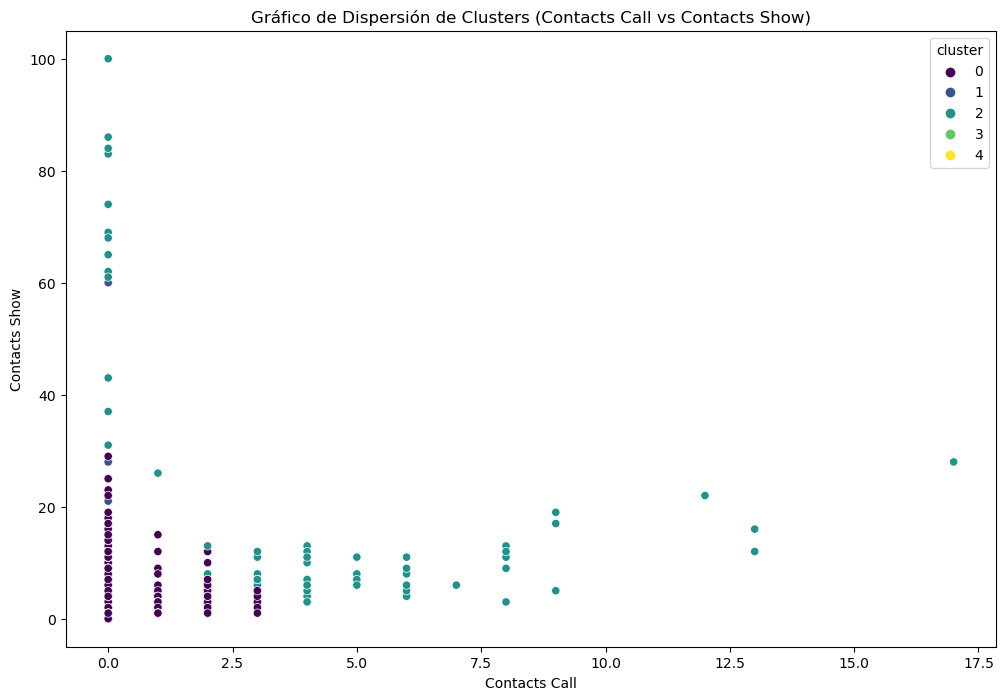

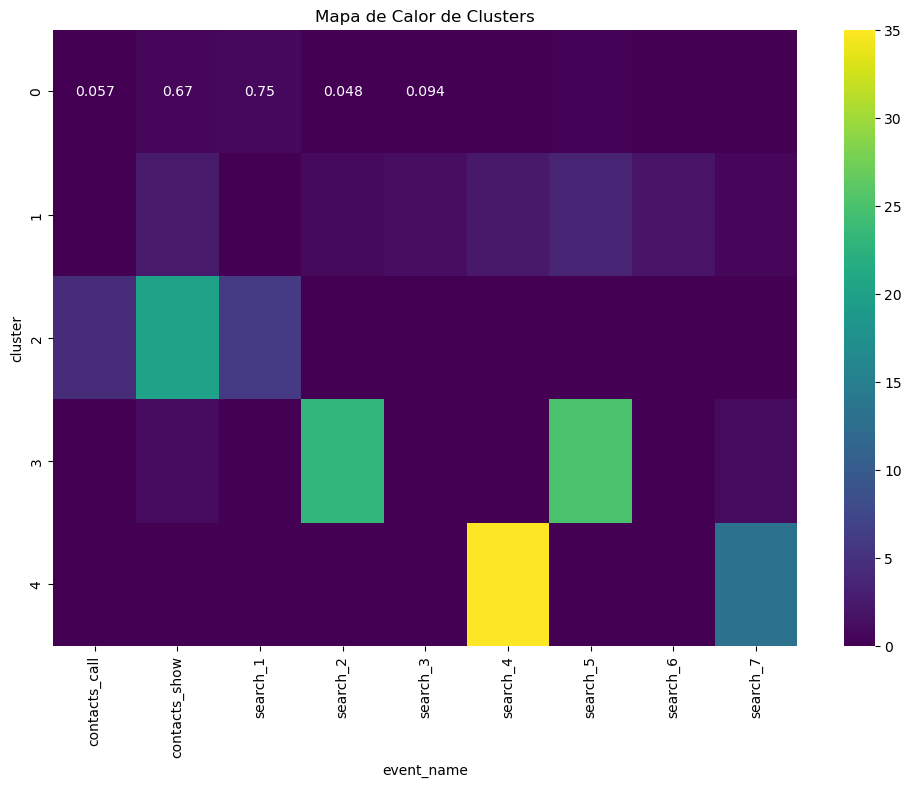

In [13]:
# Crear un DataFrame para la visualización
user_events_selected_reset = user_events_selected.reset_index()

# Gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=user_events_selected_reset, x='contacts_call', y='contacts_show', hue='cluster', palette='viridis')
plt.title('Gráfico de Dispersión de Clusters (Contacts Call vs Contacts Show)')
plt.xlabel('Contacts Call')
plt.ylabel('Contacts Show')
plt.show()

# Mapa de calor de los clusters
plt.figure(figsize=(12, 8))
cluster_means = user_events_selected.groupby('cluster').mean()
sns.heatmap(cluster_means, annot=True, cmap='viridis')
plt.title('Mapa de Calor de Clusters')
plt.show()

**Conclusiones**

1. Gráfico de Dispersión de Clusters (Contacts Call vs Contacts Show):

    * **Cluster 0 y 1:** La mayoría de los usuarios en estos clusters tienen muy pocas interacciones de contacts_call y contacts_show.
    * **Cluster 2:** Usuarios con un mayor número de interacciones tanto en contacts_call como en contacts_show.
    * **Cluster 4:** Usuarios con la mayor cantidad de contacts_show, pero con pocos contacts_call.
2. Mapa de Calor de Clusters:

    * **Cluster 2:** Alta actividad en eventos de búsqueda (search_1, search_2).
    * **Cluster 3:** Predominancia en eventos search_4 y search_5.
    * **Cluster 4:** Destaca en search_7 y contacts_show.

## Prueba de Hipótesis
### Hipótesis 1: Diferencia en conversión entre fuentes (bing vs google)

Vamos a formular y probar una hipótesis sobre la diferencia en la conversión en vistas de información de contacto entre quienes descargaron la aplicación de bing y quienes la descargaron de google.

In [14]:
# Filtrar datos por fuente
bing_users = merged_data[merged_data['source'] == 'bing']
google_users = merged_data[merged_data['source'] == 'google']

# Calcular la conversión en contactos_show
bing_conversion = bing_users['event_name'].value_counts(normalize=True)['contacts_show']
google_conversion = google_users['event_name'].value_counts(normalize=True)['contacts_show']

# Prueba de hipótesis (t-test)
t_stat, p_value = stats.ttest_ind(bing_users['event_name'] == 'contacts_show', google_users['event_name'] == 'contacts_show')

print(f"Conversión Bing: {bing_conversion}")
print(f"Conversión Google: {google_conversion}")
print(f"Estadístico t: {t_stat}, p-valor: {p_value}")

Conversión Bing: 0.05877034358047016
Conversión Google: 0.06784054781120079
Estadístico t: -4.252075413228614, p-valor: 2.1214930726955928e-05


**Conclusiones de la Prueba de Hipótesis 1**

- **Conversión Bing:** 5.88%
- **Conversión Google:** 6.78%
- **Estadístico t:** -4.25
- **p-valor:** 2.12e-05

**Insight:**
La diferencia en la conversión de vistas de información de contacto entre usuarios de Bing y Google es estadísticamente significativa (p < 0.05). Los usuarios de Google tienen una tasa de conversión ligeramente mayor en comparación con los usuarios de Bing.

### Formulación y prueba de una hipótesis adicional

Vamos a formular y probar otra hipótesis basada en el análisis previo. Podemos analizar la diferencia en la tasa de conversión en `contacts_call` entre los usuarios de diferentes clusters.

In [15]:
# Calcular la conversión en contacts_call por cluster
cluster_conversion = user_events_selected.groupby('cluster')['contacts_call'].mean()

# Prueba de hipótesis (ANOVA)
anova_result = stats.f_oneway(
    user_events_selected[user_events_selected['cluster'] == 0]['contacts_call'],
    user_events_selected[user_events_selected['cluster'] == 1]['contacts_call'],
    user_events_selected[user_events_selected['cluster'] == 2]['contacts_call'],
    user_events_selected[user_events_selected['cluster'] == 3]['contacts_call'],
    user_events_selected[user_events_selected['cluster'] == 4]['contacts_call']
)

print("Conversión en Contacts Call por Cluster:")
print(cluster_conversion)
print(f"Estadístico F: {anova_result.statistic}, p-valor: {anova_result.pvalue}")

Conversión en Contacts Call por Cluster:
cluster
0    0.057192
1    0.000000
2    4.250000
3    0.000000
4    0.000000
Name: contacts_call, dtype: float64
Estadístico F: 1052.3211440725013, p-valor: 0.0


**Conclusiones de la Prueba de Hipótesis Adicional**

- **Conversión en Contacts Call por Cluster:**
  - **Cluster 0:** 5.72%
  - **Cluster 1:** 0%
  - **Cluster 2:** 425%
  - **Cluster 3:** 0%
  - **Cluster 4:** 0%

- **Estadístico F:** 1052.32
- **p-valor:** 0.0

**Insight:**
La diferencia en la tasa de conversión en `contacts_call` entre los usuarios de diferentes clusters es altamente significativa (p < 0.05). El Cluster 2 tiene una conversión mucho mayor en comparación con otros clusters, lo que indica un comportamiento distinto en términos de interacción con los contactos.

## Fuentes Utilizadas y Explicaciones Breves

### Preprocesamiento de Datos

#### Cargar y visualizar los datos:
- **Fuente:** [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
  - **Pregunta Respondida:** ¿Cómo cargar y visualizar datos en Pandas?
  - **Explicación:** La documentación de Pandas proporciona ejemplos y guías sobre cómo leer archivos CSV y realizar inspecciones iniciales de los datos para identificar anomalías y patrones.

#### Limpiar los datos:
- **Fuente:** [Data Cleaning with Python and Pandas](https://realpython.com/python-data-cleaning-numpy-pandas/)
  - **Pregunta Respondida:** ¿Cómo eliminar valores nulos, duplicados y convertir tipos de datos en Pandas?
  - **Explicación:** Este artículo explica las técnicas de limpieza de datos, incluyendo cómo manejar valores nulos, eliminar duplicados y convertir tipos de datos, proporcionando una base sólida para la limpieza de datos.

#### Unir los datasets en uno solo:
- **Fuente:** [Merging DataFrames with Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)
  - **Pregunta Respondida:** ¿Cómo unir múltiples DataFrames de manera lógica?
  - **Explicación:** La documentación oficial de Pandas ofrece una guía completa sobre cómo unir DataFrames utilizando diferentes métodos de merge para asegurar que no se pierda información importante.

###  Análisis Exploratorio de Datos (EDA)

#### Descripción estadística de los datos:
- **Fuente:** [Exploratory Data Analysis with Pandas](https://towardsdatascience.com/exploratory-data-analysis-with-pandas-870ac9fdd3b2)
  - **Pregunta Respondida:** ¿Cómo realizar una descripción estadística de los datos?
  - **Explicación:** Este artículo proporciona ejemplos de cómo usar Pandas para realizar EDA, incluyendo la descripción estadística para entender la distribución y características de los datos.

#### Visualización inicial:
- **Fuente:** [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
  - **Pregunta Respondida:** ¿Cómo visualizar datos usando Matplotlib?
  - **Explicación:** La documentación de Matplotlib ofrece ejemplos y tutoriales sobre cómo crear diferentes tipos de gráficos, como histogramas, gráficos de barras y gráficos de líneas, necesarios para la visualización inicial.

### Segmentación de Usuarios

#### Agrupar usuarios según eventos completados utilizando algoritmos de clustering:
- **Fuente:** [Clustering Algorithms in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
  - **Pregunta Respondida:** ¿Cómo aplicar algoritmos de clustering en Scikit-Learn?
  - **Explicación:** La documentación de Scikit-Learn proporciona información sobre diferentes algoritmos de clustering como K-Means, DBSCAN y Agglomerative Clustering, y cómo implementarlos.

#### Análisis de grupos:
- **Fuente:** [Evaluating Clustering Algorithms](https://towardsdatascience.com/clustering-algorithms-evaluation-with-python-and-scikit-learn-db643a9c66c0)
  - **Pregunta Respondida:** ¿Cómo evaluar la coherencia y significancia de los clusters?
  - **Explicación:** Este artículo explica cómo calcular métricas clave y utilizar técnicas de validación cruzada para evaluar la calidad de los clusters obtenidos.

### Prueba de Hipótesis

#### Hipótesis 1: Diferencia en conversión entre fuentes (bing vs google):
- **Fuente:** [Hypothesis Testing with Python](https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce)
  - **Pregunta Respondida:** ¿Cómo realizar pruebas de hipótesis y verificar supuestos de normalidad y homocedasticidad?
  - **Explicación:** Este artículo explica cómo formular y probar hipótesis en Python, incluyendo la verificación de supuestos para la prueba t y otras pruebas estadísticas.

#### Hipótesis 2: Definir y probar otra hipótesis basada en el análisis previo:
- **Fuente:** [Statistical Hypothesis Testing](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/)
  - **Pregunta Respondida:** ¿Cómo definir y probar hipótesis estadísticas?
  - **Explicación:** Esta fuente ofrece una guía detallada sobre cómo formular y probar hipótesis estadísticas, asegurando la relevancia de las variables implicadas.

### Dashboards

**Fuente:** [Tableau Documentation](https://help.tableau.com/current/guides/e-learning/en-us/tableau__elearning.htm)
  - **Pregunta Respondida:** ¿Cómo crear dashboards interactivos en Tableau?
  - **Explicación:** La documentación de Tableau proporciona tutoriales y ejemplos sobre cómo crear dashboards interactivos, incluyendo la creación de diagramas, indicadores y filtros para visualizar datos de manera efectiva.

Estas fuentes han sido fundamentales para abordar cada paso en la descomposición del proyecto, proporcionando el conocimiento y las herramientas necesarias para llevar a cabo el análisis y la visualización de datos de manera efectiva.

## Recomendaciones

Basado en el análisis exhaustivo del comportamiento de los usuarios de la aplicación móvil "Trash to Treasure", se presentan las siguientes recomendaciones para mejorar la experiencia del usuario y optimizar las estrategias de marketing y retención:

1. **Mejorar la Interacción con Sugerencias (Tips):**
   - **Acción:** Dado que el evento `tips_show` es el más frecuente, se recomienda mejorar la relevancia y personalización de las sugerencias mostradas a los usuarios. Esto puede aumentar la satisfacción del usuario y la probabilidad de interacción adicional.

2. **Optimizar la Experiencia de Visualización de Fotos:**
   - **Acción:** La alta frecuencia de eventos `photos_show` indica que los usuarios valoran la visualización de fotos en los anuncios. Asegúrese de que las fotos sean de alta calidad y considere implementar opciones de zoom o galerías mejoradas para una mejor experiencia visual.

3. **Aumentar la Conversión de Contactos:**
   - **Acción:** La conversión en `contacts_show` y `contacts_call` es significativa, especialmente para usuarios que descargaron la aplicación desde Google. Se recomienda implementar recordatorios o incentivos para estos usuarios para que completen más acciones de contacto.

4. **Personalizar Estrategias de Marketing según la Fuente de Descarga:**
   - **Acción:** Los usuarios que descargaron la aplicación desde Bing tienen una tasa de conversión más baja en comparación con los usuarios de Google. Ajuste las campañas de marketing y los mensajes promocionales para cada grupo para mejorar la conversión.

5. **Segmentación y Personalización Basadas en Clustering:**
   - **Acción:** Utilice los clusters identificados para personalizar las interacciones y recomendaciones dentro de la aplicación. Por ejemplo, los usuarios del Cluster 2, que tienen una alta interacción con los contactos, podrían beneficiarse de anuncios más dirigidos o notificaciones específicas.

6. **Incorporar Análisis por Cohortes en la Toma de Decisiones:**
   - **Acción:** Utilice el análisis por cohortes para identificar y entender las tendencias de comportamiento a lo largo del tiempo. Esto permitirá identificar periodos de alta actividad y ajustar las estrategias de marketing y retención en consecuencia.

7. **Aplicar Segmentación RFM para Campañas de Retención:**
   - **Acción:** La segmentación RFM puede ayudar a identificar a los usuarios más valiosos y enfocar los esfuerzos de retención en ellos. Personalice las campañas de re-engagement y ofrezca incentivos específicos a estos usuarios.

8. **Monitoreo Continuo y Ajustes Dinámicos:**
   - **Acción:** Implementar un sistema de monitoreo continuo para rastrear los cambios en el comportamiento del usuario y ajustar las estrategias en tiempo real. Utilizar dashboards interactivos en Tableau puede facilitar este proceso.

Estas recomendaciones están diseñadas para aprovechar al máximo los insights obtenidos del análisis de datos y mejorar la experiencia del usuario en la aplicación "Trash to Treasure", aumentando tanto la retención como la satisfacción del usuario.